In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
#Data Collection
nifty_50 = pd.read_html("https://en.wikipedia.org/wiki/NIFTY_50")[2].Symbol
nifty_50.head(10)

0      ADANIENT
1    ADANIPORTS
2    APOLLOHOSP
3    ASIANPAINT
4      AXISBANK
5    BAJAJ-AUTO
6    BAJFINANCE
7    BAJAJFINSV
8          BPCL
9    BHARTIARTL
Name: Symbol, dtype: object

In [3]:
nifty_50.describe()

count           50
unique          50
top       ADANIENT
freq             1
Name: Symbol, dtype: object

In [4]:
nifty_50 += ".NS"
nifty_50.to_list()
nifty = [i for i in nifty_50]
data = yf.download(nifty, start = "2012-01-01").stack()

[*********************100%%**********************]  50 of 50 completed


In [5]:
data.head(10)

Adj Close        Close         High          Low  \
Date                                                                           
2012-01-02 ADANIENT.NS      37.360771    44.242844    44.909592    43.376842   
           ADANIPORTS.NS   107.228638   114.699997   123.750000   111.000000   
           APOLLOHOSP.NS   525.642944   552.599976   573.150024   548.150024   
           ASIANPAINT.NS   235.916962   259.029999   261.795013   256.000000   
           AXISBANK.NS     148.065018   158.960007   163.000000   156.800003   
           BAJAJ-AUTO.NS  1032.468262  1475.500000  1600.000000  1442.000000   
           BAJAJFINSV.NS    40.790794    41.268360    42.545563    41.076778   
           BAJFINANCE.NS    55.175648    58.625214    59.460773    57.847946   
           BHARTIARTL.NS   297.790588   316.587891   320.352448   314.246552   
           BPCL.NS          45.257984    80.083336    81.166664    79.383331   

                                 Open     Volume  
Date                                              
2012-01-02 ADANIENT.NS      44.909592  4426427.0  
           ADANIPORTS.NS   122.800003  1572363.0  
           APOLLOHOSP.NS   558.500000   226540.0  
           ASIANPAINT.NS   256.000000   182450.0  
           AXISBANK.NS     162.000000  9727265.0  
           BAJAJ-AUTO.NS  1600.000000  1562234.0  
           BAJAJFINSV.NS    42.540649   186103.0  
           BAJFINANCE.NS    58.974979    44443.0  
           BHARTIARTL.NS   316.312439  2138824.0  
           BPCL.NS          80.816666  3349536.0

In [6]:
data.tail(10)

Adj Close         Close          High  \
Date                                                                 
2024-02-02 SUNPHARMA.NS    1416.650024   1416.650024   1433.849976   
           TATACONSUM.NS   1162.750000   1162.750000   1170.699951   
           TATAMOTORS.NS    878.750000    878.750000    895.750000   
           TATASTEEL.NS     138.699997    138.699997    139.600006   
           TCS.NS          3966.300049   3966.300049   3984.399902   
           TECHM.NS        1338.099976   1338.099976   1354.000000   
           TITAN.NS        3612.399902   3612.399902   3713.449951   
           ULTRACEMCO.NS  10098.549805  10098.549805  10165.900391   
           UPL.NS           533.650024    533.650024    540.650024   
           WIPRO.NS         483.149994    483.149994    486.500000   

                                  Low          Open      Volume  
Date                                                             
2024-02-02 SUNPHARMA.NS   1405.150024   1409.000000   1775327.0  
           TATACONSUM.NS  1132.000000   1132.000000   1741024.0  
           TATAMOTORS.NS   876.849976    886.000000  13000031.0  
           TATASTEEL.NS    134.800003    135.300003  69265966.0  
           TCS.NS         3872.000000   3875.050049   2824983.0  
           TECHM.NS       1323.050049   1323.500000   1838131.0  
           TITAN.NS       3602.449951   3635.000000   2320050.0  
           ULTRACEMCO.NS  9992.299805  10000.000000    334373.0  
           UPL.NS          529.250000    533.900024   4220029.0  
           WIPRO.NS        475.000000    475.000000   8144890.0

In [7]:
#Calculating Yearly Returns
data["Yearly Returns"] = data.groupby(level=1)["Adj Close"].transform(lambda x: x.pct_change(252))
data

Adj Close         Close          High  \
Date                                                                 
2012-01-02 ADANIENT.NS       37.360771     44.242844     44.909592   
           ADANIPORTS.NS    107.228638    114.699997    123.750000   
           APOLLOHOSP.NS    525.642944    552.599976    573.150024   
           ASIANPAINT.NS    235.916962    259.029999    261.795013   
           AXISBANK.NS      148.065018    158.960007    163.000000   
...                                ...           ...           ...   
2024-02-02 TECHM.NS        1338.099976   1338.099976   1354.000000   
           TITAN.NS        3612.399902   3612.399902   3713.449951   
           ULTRACEMCO.NS  10098.549805  10098.549805  10165.900391   
           UPL.NS           533.650024    533.650024    540.650024   
           WIPRO.NS         483.149994    483.149994    486.500000   

                                  Low          Open     Volume  Yearly Returns  
Date                                                                            
2012-01-02 ADANIENT.NS      43.376842     44.909592  4426427.0             NaN  
           ADANIPORTS.NS   111.000000    122.800003  1572363.0             NaN  
           APOLLOHOSP.NS   548.150024    558.500000   226540.0             NaN  
           ASIANPAINT.NS   256.000000    256.000000   182450.0             NaN  
           AXISBANK.NS     156.800003    162.000000  9727265.0             NaN  
...                               ...           ...        ...             ...  
2024-02-02 TECHM.NS       1323.050049   1323.500000  1838131.0        0.330655  
           TITAN.NS       3602.449951   3635.000000  2320050.0        0.528674  
           ULTRACEMCO.NS  9992.299805  10000.000000   334373.0        0.489743  
           UPL.NS          529.250000    533.900024  4220029.0       -0.272859  
           WIPRO.NS        475.000000    475.000000  8144890.0        0.190803  

[145119 rows x 7 columns]

In [8]:
#Ranking Stocks according to their performance 
data.index.names = ["Date", "Symbol"]
yearly_data = data.reset_index(level=1).groupby([pd.Grouper(freq="1Y"), "Symbol"])["Yearly Returns"].last().to_frame()
yearly_data["Rank"] = yearly_data.groupby(level=0)["Yearly Returns"].transform(lambda x: x.rank(ascending=False))
yearly_data

Yearly Returns  Rank
Date       Symbol                             
2012-12-31 ADANIENT.NS               NaN   NaN
           ADANIPORTS.NS             NaN   NaN
           APOLLOHOSP.NS             NaN   NaN
           ASIANPAINT.NS             NaN   NaN
           AXISBANK.NS               NaN   NaN
...                                  ...   ...
2024-12-31 TECHM.NS             0.330655  20.0
           TITAN.NS             0.528674  12.0
           ULTRACEMCO.NS        0.489743  14.0
           UPL.NS              -0.272859  49.0
           WIPRO.NS             0.190803  32.0

[636 rows x 2 columns]

In [9]:
#Identifying top stocks
top_stocks = yearly_data[yearly_data["Rank"]<5]
top_stocks.head(10)

Yearly Returns  Rank
Date       Symbol                             
2013-12-31 BRITANNIA.NS         0.892724   3.0
           EICHERMOT.NS         0.867818   4.0
           HCLTECH.NS           1.008780   2.0
           TECHM.NS             1.041577   1.0
2014-12-31 ADANIPORTS.NS        1.023151   4.0
           BAJFINANCE.NS        1.347744   2.0
           BRITANNIA.NS         1.100974   3.0
           EICHERMOT.NS         2.056124   1.0
2015-12-31 BAJAJFINSV.NS        0.519398   3.0
           BAJFINANCE.NS        0.811464   1.0

In [10]:
#Storing information about these stocks for trading
top_stocks = top_stocks.reset_index(level=1)
top_stocks.index = top_stocks.index + pd.DateOffset(1)
top_stocks = top_stocks.reset_index().set_index(["Date", "Symbol"])
top_stocks.head(10)

Yearly Returns  Rank
Date       Symbol                             
2014-01-01 BRITANNIA.NS         0.892724   3.0
           EICHERMOT.NS         0.867818   4.0
           HCLTECH.NS           1.008780   2.0
           TECHM.NS             1.041577   1.0
2015-01-01 ADANIPORTS.NS        1.023151   4.0
           BAJFINANCE.NS        1.347744   2.0
           BRITANNIA.NS         1.100974   3.0
           EICHERMOT.NS         2.056124   1.0
2016-01-01 BAJAJFINSV.NS        0.519398   3.0
           BAJFINANCE.NS        0.811464   1.0

In [11]:
dates = top_stocks.index.get_level_values("Date").unique().tolist()
stock_info = {}
for date in dates:
    stock_info[date.strftime("%Y-%m-%d")] = top_stocks.xs(date, level=0).index.tolist()
stock_info

{'2014-01-01': ['BRITANNIA.NS', 'EICHERMOT.NS', 'HCLTECH.NS', 'TECHM.NS'],
 '2015-01-01': ['ADANIPORTS.NS',
  'BAJFINANCE.NS',
  'BRITANNIA.NS',
  'EICHERMOT.NS'],
 '2016-01-01': ['BAJAJFINSV.NS', 'BAJFINANCE.NS', 'BPCL.NS', 'BRITANNIA.NS'],
 '2017-01-01': ['HINDALCO.NS', 'JSWSTEEL.NS', 'TATASTEEL.NS', 'UPL.NS'],
 '2018-01-01': ['ADANIENT.NS', 'BAJFINANCE.NS', 'TATACONSUM.NS', 'TITAN.NS'],
 '2019-01-01': ['ADANIENT.NS', 'BAJFINANCE.NS', 'LTIM.NS', 'TECHM.NS'],
 '2020-01-01': ['BAJFINANCE.NS', 'BHARTIARTL.NS', 'HDFCLIFE.NS', 'SBILIFE.NS'],
 '2021-01-01': ['ADANIENT.NS', 'DIVISLAB.NS', 'LTIM.NS', 'TATACONSUM.NS'],
 '2022-01-01': ['ADANIENT.NS', 'APOLLOHOSP.NS', 'LTIM.NS', 'TATAMOTORS.NS'],
 '2023-01-01': ['ADANIENT.NS', 'COALINDIA.NS', 'ITC.NS', 'M&M.NS'],
 '2024-01-01': ['BAJAJ-AUTO.NS', 'COALINDIA.NS', 'NTPC.NS', 'TATAMOTORS.NS'],
 '2025-01-01': ['BAJAJ-AUTO.NS', 'COALINDIA.NS', 'NTPC.NS', 'TATAMOTORS.NS']}

In [12]:
#Calculating returns of these stocks
returns = data["Adj Close"].unstack().pct_change()

In [13]:
#Developing our portfolio
portfolio = pd.DataFrame()
for start in stock_info.keys():
    end = (pd.to_datetime(start) + pd.DateOffset(365)).strftime("%Y-%m-%d")
    temp = returns[start:end][stock_info[start]].dropna().mean(axis=1).to_frame("Portfolio Returns")
    portfolio = pd.concat([portfolio, temp])
portfolio

,Portfolio Returns
Date,
2014-01-01,-0.001401
2014-01-02,-0.006593
2014-01-03,0.005815
2014-01-06,-0.005795
2014-01-07,-0.001516
...,...
2024-01-29,0.030181
2024-01-30,-0.007328
2024-01-31,0.014582


<AxesSubplot:xlabel='Date'>

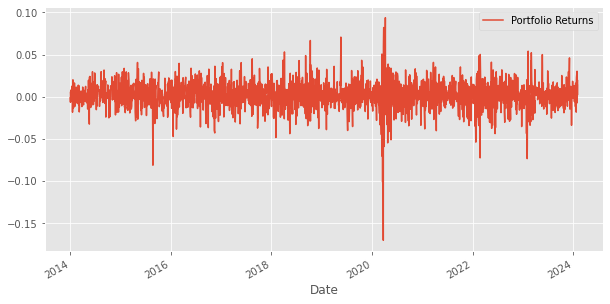

In [14]:
#Plot illustrating returns generated by our portfolio everyday
portfolio.plot(figsize=(10,5))

In [15]:
#Calculating cumulative returns generated by our portfolio
portfolio_cumulative_returns = np.exp(np.log1p(portfolio).cumsum())
portfolio_cumulative_returns.head(40)

,Portfolio Returns
Date,
2014-01-01,0.998599
2014-01-02,0.992015
2014-01-03,0.997784
2014-01-06,0.992002
2014-01-07,0.990498
2014-01-08,0.998460
2014-01-09,1.000496
2014-01-10,1.007753
2014-01-13,1.020309


Text(0, 0.5, 'Cumulative Returns')

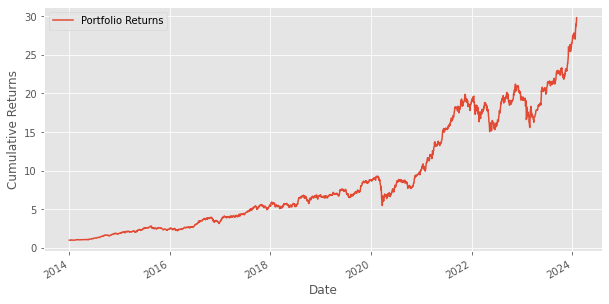

In [16]:
#Plot illustrating growth of returns
portfolio_cumulative_returns.plot(figsize=(10,5))
plt.ylabel("Cumulative Returns")

In [17]:
#Calculating returns generated by Nifty index
nifty_index = yf.download("^NSEI", start=portfolio_cumulative_returns.index.min(), end=portfolio_cumulative_returns.index.max())
nifty_index["Index Returns"] = nifty_index["Adj Close"].pct_change()

[*********************100%%**********************]  1 of 1 completed


In [18]:
#Comparing our returns to Nifty index's returns
comparison = portfolio.merge(nifty_index["Index Returns"], left_index=True, right_index=True).dropna()
comparison

,Portfolio Returns,Index Returns
Date,,
2014-01-03,0.005815,-0.001607
2014-01-06,-0.005795,-0.003172
2014-01-07,-0.001516,-0.004716
2014-01-08,0.008038,0.002004
2014-01-09,0.002039,-0.001012
...,...,...
2024-01-25,0.022844,-0.004724
2024-01-29,0.030181,0.018031
2024-01-30,-0.007328,-0.009914


Text(0.5, 1.0, 'Comparison of Cumulative Returns')

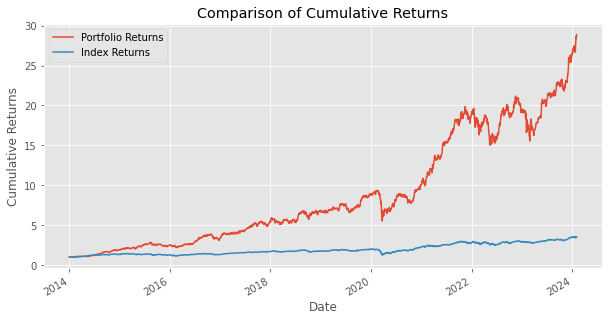

In [19]:
#Plot illustrating superior performance of our strategy
portfolio_cumulative_returns = np.exp(np.log1p(comparison).cumsum())
portfolio_cumulative_returns.plot(figsize=(10,5))
plt.ylabel("Cumulative Returns")
plt.title("Comparison of Cumulative Returns")

In [20]:
#Calculating Excess Returns
risk_free_rate = 0.1/252
comparison["Excess Returns"] = comparison["Portfolio Returns"] - risk_free_rate
comparison

,Portfolio Returns,Index Returns,Excess Returns
Date,,,
2014-01-03,0.005815,-0.001607,0.005418
2014-01-06,-0.005795,-0.003172,-0.006192
2014-01-07,-0.001516,-0.004716,-0.001913
2014-01-08,0.008038,0.002004,0.007641
2014-01-09,0.002039,-0.001012,0.001642
...,...,...,...
2024-01-25,0.022844,-0.004724,0.022447
2024-01-29,0.030181,0.018031,0.029784
2024-01-30,-0.007328,-0.009914,-0.007725


In [21]:
#Calculating Sharpe Ratio
sharpe_ratio = np.sqrt(252)*comparison["Excess Returns"].mean()/comparison["Excess Returns"].std()
print("Sharpe Ratio : ",sharpe_ratio)

Sharpe Ratio :  1.1152382330801098


In [22]:
portfolio_cumulative_returns.tail(20)

,Portfolio Returns,Index Returns
Date,,
2024-01-03,26.647030,3.462735
2024-01-04,26.948184,3.485466
2024-01-05,26.907956,3.493867
2024-01-08,26.862016,3.462035
2024-01-09,27.216315,3.467161
2024-01-10,27.056937,3.479045
2024-01-11,27.383227,3.483631
2024-01-12,27.329492,3.523437
2024-01-15,27.461280,3.556089


In [23]:
#Calculating Cumulative Returns Generated
print("Cumulative returns generated in percentage : ", portfolio_cumulative_returns["Portfolio Returns"].iloc[-1])

Cumulative returns generated in percentage :  28.8691792557138
